## Import des données

In [1]:
from skimage import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

folder_directory = "../data/ChicagoFacesData"
list_files = []

for path, subdirs, files in os.walk(folder_directory):
    for name in files:
        if name[-4:]=='.jpg':
            #print(os.path.join(path, name))
            list_files.append(os.path.join(path, name))
print(list_files)

['../data/ChicagoFacesData\\AF-200\\CFD-AF-200-228-N.jpg', '../data/ChicagoFacesData\\AF-201\\CFD-AF-201-060-N.jpg', '../data/ChicagoFacesData\\AF-202\\CFD-AF-202-122-N.jpg', '../data/ChicagoFacesData\\AF-203\\CFD-AF-203-077-N.jpg', '../data/ChicagoFacesData\\AF-204\\CFD-AF-204-067-N.jpg', '../data/ChicagoFacesData\\AF-205\\CFD-AF-205-155-N.jpg', '../data/ChicagoFacesData\\AF-206\\CFD-AF-206-079-N.jpg', '../data/ChicagoFacesData\\AF-207\\CFD-AF-207-023-N.jpg', '../data/ChicagoFacesData\\AF-208\\CFD-AF-208-003-N.jpg', '../data/ChicagoFacesData\\AF-209\\CFD-AF-209-006-N.jpg', '../data/ChicagoFacesData\\AF-210\\CFD-AF-210-050-N.jpg', '../data/ChicagoFacesData\\AF-211\\CFD-AF-211-066-N.jpg', '../data/ChicagoFacesData\\AF-212\\CFD-AF-212-097-N.jpg', '../data/ChicagoFacesData\\AF-213\\CFD-AF-213-126-N.jpg', '../data/ChicagoFacesData\\AF-214\\CFD-AF-214-139-N.jpg', '../data/ChicagoFacesData\\AF-215\\CFD-AF-215-70-N.jpg', '../data/ChicagoFacesData\\AF-216\\CFD-AF-216-106-N.jpg', '../data/Chica

In [3]:
index_image = np.random.randint(len(list_files))
print(index_image,'/',len(list_files))
im = Image.open(list_files[index_image])
im.show()

832 / 1207


In [4]:
class EssaiChicagoFacesDataset:
    """Chicago Faces dataset."""

    def __init__(self, csv_file, root_dir):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
        """
        self.root_dir = root_dir
        self.init_get_path_files()

    def init_get_path_files(self):
        self.list_files = []
        self.dic_sample = {}
        folder_directory = self.root_dir

        for path, subdirs, files in os.walk(folder_directory):
            for name in files:
                if name[-4:] == '.jpg':
                    #print(path, name)
                    self.list_files.append(os.path.join(path, name))
        # print(self.list_files)

    def __len__(self):
        return len(self.list_files)

    def __getitem__(self, idx):
        #img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        img_name = os.path.join(self.list_files[idx])
        image = io.imread(img_name, as_gray=True)
        image = self.SquareCrop(image)
        name_image = self.list_files[idx][-28:-4]
        target = self.list_files[idx][-5:-4]
        if target == 'C' or target == 'O':
            target = self.list_files[idx][-6:-4]
        self.dic_sample[idx] = [name_image, image, target]
        return self.dic_sample[idx]
    
    def SquareCrop(self, image):
        h, w = image.shape[:2]
        dim = min(h, w)
        image = image[h//2-dim//2:h//2+dim//2, w//2-dim//2:w//2+dim//2]
        return image
        

In [5]:
faces_dataset = EssaiChicagoFacesDataset(csv_file='../data/ChicagoFacesData/CFD_2.0.3_Norming_Data_and_Codebook.csv',
                                    root_dir='../data/ChicagoFacesData/')

832


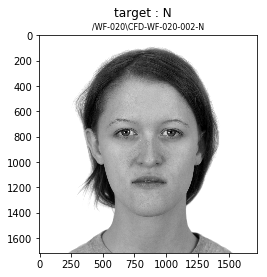

In [6]:
print(index_image)
plt.gray() # l'image est déjà en niveaux de gris, c'est juste pour éviter d'avoir l'affichage entre bleu et jaune
plt.suptitle("target : " + faces_dataset[index_image][2], fontsize=12)
plt.title(faces_dataset[index_image][0], fontsize=8)
plt.imshow(faces_dataset[index_image][1])


## Implémentation dans where_chicago

In [7]:
from torchvision import transforms
from skimage import io

In [8]:
import sys
sys.path.append("../figures")

from where_chicago import WhereSquareCrop, OnlineRetinaTransform, RetinaFill, CollFill, WhereShift, RetinaBackground, RetinaMask, RetinaWhiten, TransformDico
from where_chicago import ChicagoFacesDataset, RetinaTransform, WhereNet, CollTransform, Normalize, WhereTrainer, Where, WhereZoom, WhereGrey, WhereRotate

In [9]:
from main import init
args = init(filename='../data/2019-07-08')
args.train_batch_size = 1000
args.test_batch_size = 207
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 1000,
 'test_batch_size': 207,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-13',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'zoom': 300,
 'rotation': 30}

In [10]:
from retina_copie import Retina
retina = Retina(args)

../tmp/retina_6_24_10_2_1.41_1718_dico.npy
Fichier retina_dico charge avec succes
../tmp/colliculus_transform_6_24_10_2_1.41_1718_dico.npy
Fichier colliculus_transform_dico charge avec succes


In [19]:
transform=transforms.Compose([
                                 
                               WhereSquareCrop(args),
                                WhereZoom(args),
                                WhereRotate(args),
                                WhereGrey(args)
                                
                               #RetinaFill(N_pic=args.N_pic),
                               #WhereShift(args, theta=3*math.pi/4), 
                               #WhereShift(args, radius = 18), 
                               #WhereShift(args, i_offset=None, j_offset=None),
                               #RetinaBackground( contrast=args.contrast,
                                                 #noise=args.noise,
                                                 #sf_0=args.sf_0,
                                                 #B_sf=args.B_sf),
                               #RetinaMask(N_pic=args.N_pic),
                               #RetinaWhiten(N_pic=args.N_pic),
                                #TransformDico(retina)
                               #RetinaTransform(retina.retina_transform_vector),
                               #Normalize()
                           ])

In [20]:
dataset = ChicagoFacesDataset(csv_file='../data/ChicagoFacesData/CFD_2.0.3_Norming_Data_and_Codebook.csv',
                                    root_dir='../data/ChicagoFacesData/', transform=transform)

In [21]:
index_image2 = np.random.randint(len(dataset))
filename, image, target = dataset[index_image]

WhereSquareCrop ok
WhereZoom ok
WhereRotate ok
WhereGrey ok


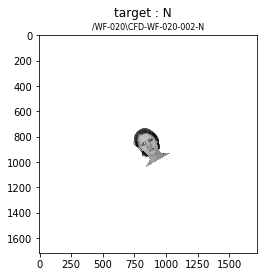

In [22]:
#print(image)

plt.gray() # l'image est déjà en niveaux de gris, c'est juste pour éviter d'avoir l'affichage entre bleu et jaune
plt.suptitle("target : " + target, fontsize=12)
plt.title(filename, fontsize=8)
plt.imshow(image)
#plt.imshow(image[:,:,0])

## Zone expérimentale

### Essai Numpy

[[0.5 4. ]
 [7.  9. ]]
<class 'numpy.ndarray'>


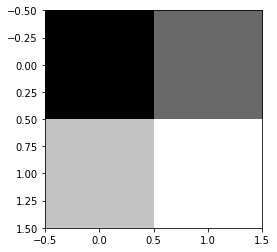

In [17]:
data = np.asarray([[0.5,4],[7,9]])
print(data)
print(type(data))
plt.imshow(data)

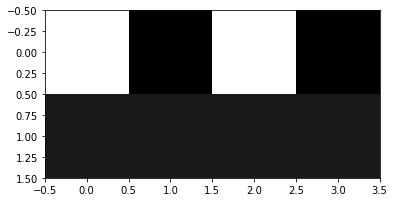

In [24]:
test = np.asarray([[10, 0, 10, 0],[1, 1, 1, 1]])
plt.imshow(test)

In [25]:
test.resize((2,2))

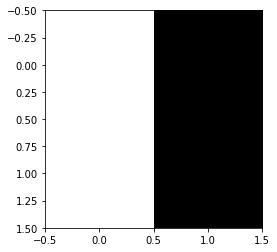

In [26]:
plt.imshow(test)

### Essais PIL

In [31]:
from PIL import Image

In [32]:
WHITE = (255, 255, 255, 0)
RED = (255, 0, 0, 0)
BLUE = (0, 0, 255, 0)

In [33]:
image_pil1 = Image.new('RGBA', (800, 800), RED)
image_pil2 = Image.new('RGBA', (800, 800), BLUE)
print(type(image_pil1))
print(type(image_pil2))
image_pil2.show()

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


In [34]:
image_pil_reduite = image_pil2.resize((200,200))

#image_pil_reduite = image_pil2
#image_pil2.thumbnail((200,200))

print(type(image_pil_reduite))
image_pil_reduite.show()
#image_pil_reduite.paste(image_pil2)
#image_pil_reduite.show()

<class 'PIL.Image.Image'>


In [35]:
box = (300,300,500,500)
image_pil1.paste(image_pil_reduite, box)
image_pil1.show()

In [36]:
image2 = Image.open("C:/Users/Marion/Desktop/CFD-AF-200-228-N-thumbnail.jpg")
print(type(image2))
image2.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [37]:
image2_reduite = image2.resize((50,50))
print(type(image2_reduite))
image2_reduite.show()

<class 'PIL.Image.Image'>


In [38]:
image2_reduite_bis = image2_reduite.resize((10,10))
print(type(image2_reduite_bis))
image2_reduite_bis.show()

<class 'PIL.Image.Image'>


In [39]:
image2_reduite_C = image2_reduite_bis.resize((200,200))
print(type(image2_reduite_C))
image2_reduite_C.show()

<class 'PIL.Image.Image'>


In [40]:
box = (300,300,500,500)
image_pil1.paste(image2_reduite_C, box)
image_pil1.show()

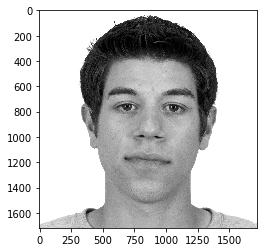

In [41]:
plt.imshow(faces_dataset[index_image][1])

In [42]:
fullfield_PIL_test = Image.fromarray(faces_dataset[index_image][1])

In [43]:
fullfield_PIL_test.show()

In [44]:
image_test = plt.imread(folder_directory + faces_dataset[index_image][0]+'.jpg')

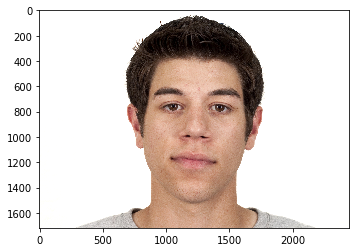

In [45]:
plt.imshow(image_test)

In [46]:
image_test_PIL = Image.fromarray(image_test)
image_test_PIL.show()

In [47]:
image_test_PIL_suite = image_test_PIL.convert('LA')
image_test_PIL_suite.show()

(1718, 2444, 2)


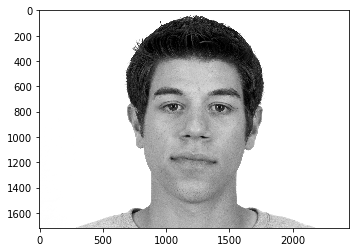

In [58]:
image_test_numpy = np.array(image_test_PIL_suite)
print(image_test_numpy.shape)
#print(image_test_numpy)

plt.imshow(image_test_numpy[:,:,0])